# Plot the fitted $\chi_{\perp}$

In [1]:
clear
homedir = getenv('HOME');
workdir = getenv('WORK');
scradir = getenv('SCRATCH');
addpath(genpath([homedir '/work_MOM']));
addpath(genpath([homedir '/mytoolbox']));
addpath(genpath([homedir '/MyFuncs']));

In [2]:
[grid, ~, ~] = read_grid_MOM('/glade/work/yueyanglu/MOM6_exp/mom_lowRES/'); 

fnmStr = 'K__chidotnSIGN_fit';

ncfnm_pt = [workdir '/MOM6_OUT/tr_off_64_180d/params/ideal_prof/GSC_fit_C09/' fnmStr '.nc'];
matfnm_pt = [workdir '/MOM6_OUT/tr_off_64_180d/params/ideal_prof/GSC_fit_C09/' fnmStr '_comp.mat'];
ds_pt = ncstruct(ncfnm_pt);
f_pt = load(matfnm_pt);

ncfnm_2 = [workdir '/MOM6_OUT/tr_off_64_180d/params/ideal_prof/GSC_fit_C11/' fnmStr '.nc'];
matfnm_2 = [workdir '/MOM6_OUT/tr_off_64_180d/params/ideal_prof/GSC_fit_C11/' fnmStr '_comp.mat'];
ds_2 = ncstruct(ncfnm_2);
f_2 = load(matfnm_2);

[x, y] = deal(grid.lonh, grid.lath);

License checkout failed.
License Manager Error -4
Maximum number of users for Optimization_Toolbox reached. 
Try again later.

Troubleshoot this issue by visiting: 
https://www.mathworks.com/support/lme/R2022b/4

Diagnostic Information:
Feature: Optimization_Toolbox 
License path: /glade/u/home/yueyanglu/.matlab/R2022b_licenses:/glade/u/apps/opt/matlab/R2022b/licenses/license.dat:/glade/u/apps/opt/matlab/R2022b/licenses/network.lic 
Licensing error: -4,132.
License checkout failed.
License Manager Error -4
Maximum number of users for Optimization_Toolbox reached. 
Try again later.

Troubleshoot this issue by visiting: 
https://www.mathworks.com/support/lme/R2022b/4

Diagnostic Information:
Feature: Optimization_Toolbox 
License path: /glade/u/home/yueyanglu/.matlab/R2022b_licenses:/glade/u/apps/opt/matlab/R2022b/licenses/license.dat:/glade/u/apps/opt/matlab/R2022b/licenses/network.lic 
Licensing error: -4,132.


## get GS core

In [3]:
ds_GS = load('GScore_mom_unsm_wide.mat'); % GScore_mom_unsm or GScore_mom
x_GSC_m = ds_GS.x_GSC_m;
y_GSC_m = ds_GS.y_GSC_m;

## plot 2 fitted profiles and one $\chi_{\perp}$ map

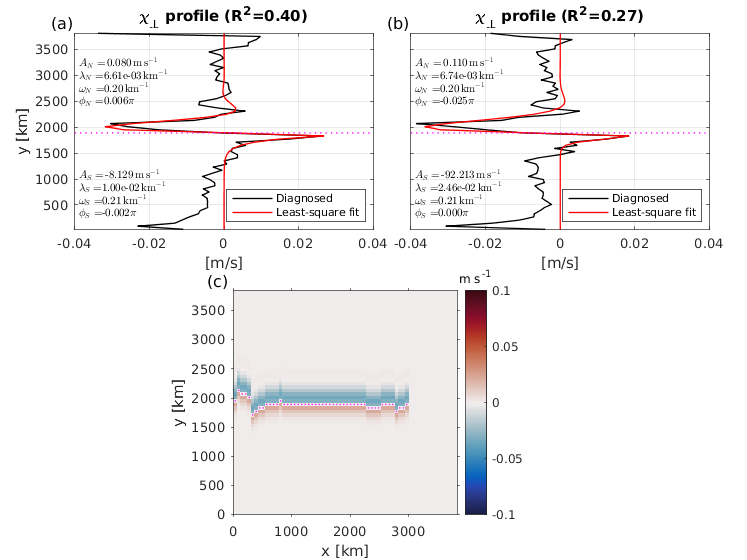

In [4]:
xlim = [-1 1]*0.04;
clim = [-1 1]*0.1;

x_top = 0.1; y_top = 0.59; h_top = 0.35; w_top = 0.4; dx = 0.05;
x_bot = x_top+w_top/2; y_bot = 0.08; h_bot = 0.4; w_bot = h_bot; dy_bot = 0.05;
% 
pos_top = { [x_top y_top w_top h_top], [x_top+w_top+dx y_top w_top h_top]};
pos_bot = [x_bot y_bot w_bot h_bot];
            
%----- cat fiited lines in S and N 
chidotn_comb = (ds_pt.chidotn + ds_2.chidotn) / 2;

font = 'DejaVu Sans';
figure('DefaultTextFontName', font, 'DefaultAxesFontName', font);

% ----- 1
fy = f_pt.fy; 
chin_fit = ds_pt.chin_fit;
R2 = 1 - sum((fy'-chin_fit).^2) / sum((fy'-mean(fy)).^2);

subplot('Position',pos_top{1});
plot(fy,y,'k-','linewidth', 1);
hold on
plot(chin_fit,y,'r-','linewidth', 1);
ax = gca;
ax.XGrid = 'on'; ax.YGrid = 'on';
ax.XLim = xlim; ax.YLim = [y(1) y(end)];
hold on
hline(mean(y_GSC_m),':m','HandleVisibility','off','linewidth', 1);
xlabel('[m/s]');  ylabel('y [km]')
title(['\chi_{\perp} profile (R^2=' num2str(R2,'%3.2f') ')'])

legend('Diagnosed','Least-square fit','fontsize',8,'location','southeast')
tbxn = annotation("textbox",'linestyle','none','Margin',3,'interpreter','latex');
tbxn.String = { ['$A_{N}=\,$'     num2str(f_pt.params_N_km(1),'%3.3f') '$\,\mathrm{m\,s^{-1}}$'],...
               ['$\lambda_{N}=$' num2str(f_pt.params_N_km(2),'%3.2e') '$\,\mathrm{km}^{-1}$'],...
               ['$\omega_{N}=$'  num2str(f_pt.params_N_km(3),'%3.2f') '$\,\mathrm{km}^{-1}$'],...
               ['$\phi_{N}=$'    num2str(f_pt.params_N_km(4)/pi,'%3.3f') '$\pi$' ] };
tbxn.Position = [x_top 0.8 0.1 0.1];
tbxn.FontSize = 8;
% 
tbxs = annotation("textbox",'linestyle','none','Margin',3,'interpreter','latex');
tbxs.String = { ['$A_{S}=\,$'    num2str(f_pt.params_S_km(1),'%3.3f') '$\,\mathrm{m\,s^{-1}}$'],...
               ['$\lambda_{S}=$' num2str(f_pt.params_S_km(2),'%3.2e') '$\,\mathrm{km}^{-1}$'],...
               ['$\omega_{S}=$'  num2str(f_pt.params_S_km(3),'%3.2f') '$\,\mathrm{km}^{-1}$'],...
               ['$\phi_{S}=$'    num2str(f_pt.params_S_km(4)/pi,'%3.3f') '$\pi$' ] };
tbxs.Position = [x_top 0.6 0.1 0.1];
tbxs.FontSize = 8;
hd = subplotlabel(ax,'(a)','location','northwestoutside','offset',[-0.08 0],'fontsize',12);

% ----- 2
fy = f_2.fy; 
chin_fit = ds_2.chin_fit;
R2 = 1 - sum((fy'-chin_fit).^2) / sum((fy'-mean(fy)).^2);

subplot('Position',pos_top{2});
plot(fy,y,'k-','linewidth', 1);
hold on
plot(chin_fit,y,'r-','linewidth', 1);
ax(2) = gca;
ax(2).XGrid = 'on'; ax(2).YGrid = 'on';
ax(2).XLim = xlim; ax(2).YLim = [y(1) y(end)];
ax(2).YTickLabel = '';
hold on
hline(mean(y_GSC_m),':m','HandleVisibility','off','linewidth', 1);
xlabel('[m/s]'); 
title(['\chi_{\perp} profile (R^2=' num2str(R2,'%3.2f') ')'])

legend('Diagnosed','Least-square fit','fontsize',8,'location','southeast')
tbxn = annotation("textbox",'linestyle','none','Margin',3,'interpreter','latex');
tbxn.String = { ['$A_{N}=\,$'     num2str(f_2.params_N_km(1),'%3.3f') '$\,\mathrm{m\,s^{-1}}$'],...
               ['$\lambda_{N}=$' num2str(f_2.params_N_km(2),'%3.2e') '$\,\mathrm{km}^{-1}$'],...
               ['$\omega_{N}=$'  num2str(f_2.params_N_km(3),'%3.2f') '$\,\mathrm{km}^{-1}$'],...
               ['$\phi_{N}=$'    num2str(f_2.params_N_km(4)/pi,'%3.3f') '$\pi$' ] };
tbxn.Position = [x_top+w_top+dx 0.8 0.1 0.1];
tbxn.FontSize = 8;
% 
tbxs = annotation("textbox",'linestyle','none','Margin',3,'interpreter','latex');
tbxs.String = {['$A_{S}=\,$'    num2str(f_2.params_S_km(1),'%3.3f') '$\,\mathrm{m\,s^{-1}}$'],...
               ['$\lambda_{S}=$' num2str(f_2.params_S_km(2),'%3.2e') '$\,\mathrm{km}^{-1}$'],...
               ['$\omega_{S}=$'  num2str(f_2.params_S_km(3),'%3.2f') '$\,\mathrm{km}^{-1}$'],...
               ['$\phi_{S}=$'    num2str(f_2.params_S_km(4)/pi,'%3.3f') '$\pi$' ] };
tbxs.Position = [x_top+w_top+dx 0.6 0.1 0.1];
tbxs.FontSize = 8;
hd(2) = subplotlabel(ax(2),'(b)','location','northwestoutside','offset',[-0.08 0],'fontsize',12);

% ----- bot
subplot('Position',pos_bot);
imagescn(x, y, chidotn_comb(:,:,1)'); axis square; 
caxis(clim); cmocean('balance'); 
cb = colorbar;
cb.Title.String = 'm s^{-1}';
hold on; scatter(x_GSC_m, y_GSC_m,6,'.m')
xlabel('x [km]');  ylabel('y [km]')
ax(3) = gca;
set(ax(3),'tickdir','out');
hd(3) = subplotlabel(ax(3),'(c)','location','northwestoutside','offset',[-0.12 0],'fontsize',12);

set(gcf,'PaperPositionMode','auto'); 

% ---
fignm = [homedir '/work_MOM/figures/fig11'];
% exportgraphics(gcf,[fignm '.pdf'], 'BackgroundColor','white','ContentType','vector')